In [20]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import tree
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier

from sklearn.tree import plot_tree
from sklearn.metrics import roc_auc_score,accuracy_score,r2_score
from sklearn.model_selection import train_test_split, GridSearchCV,KFold
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer 
from sklearn.compose import make_column_selector
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.naive_bayes import GaussianNB


import warnings


In [21]:
cancer = pd.read_csv('BreastCancer.csv').set_index('Code')
X = cancer.drop('Class',axis=1)
y = cancer['Class']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=24, test_size=0.3,stratify=y)

In [23]:
rf= RandomForestClassifier(n_estimators=10, random_state=24)
rf.fit(X_train, y_train)
y_pred= rf.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.9666666666666667


In [24]:
y_pred_prob= rf.predict_proba(X_test)[:,1]
print(roc_auc_score(y_test, y_pred_prob))

0.9938607085346216


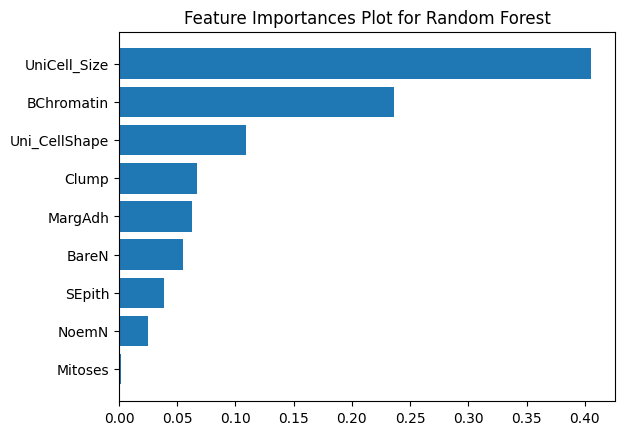

In [25]:
dtc= DecisionTreeClassifier(random_state=24)
dtc.fit(X_train,y_train)
df_imp= pd.DataFrame({'feature':list(X.columns),
               'importance':rf.feature_importances_})
df_imp.sort_values('importance', inplace=True)
plt.barh(df_imp['feature'], df_imp['importance'])
plt.title("Feature Importances Plot for Random Forest")
plt.show()

